#Transfer learning in image classification

In [1]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Install tensorflow_hub using pip install tensorflow_hub first

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
'''from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))'''

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [5]:
!wget "https://vetstudentstories.merckmanuals.com/wp-content/uploads/sites/2/2017/08/iStock-514649164.jpg"

--2023-02-08 10:59:47--  https://vetstudentstories.merckmanuals.com/wp-content/uploads/sites/2/2017/08/iStock-514649164.jpg
Resolving vetstudentstories.merckmanuals.com (vetstudentstories.merckmanuals.com)... 192.0.66.149, 2a04:fa87:fffd::c000:4295
Connecting to vetstudentstories.merckmanuals.com (vetstudentstories.merckmanuals.com)|192.0.66.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403290 (394K) [image/jpeg]
Saving to: ‘iStock-514649164.jpg’

iStock-514649164.jp 100%[===================>] 393.84K  --.-KB/s    in 0.1s    

2023-02-08 10:59:47 (3.49 MB/s) - ‘iStock-514649164.jpg’ saved [403290/403290]



In [6]:
os.rename('iStock-514649164.jpg','goldfish.jpg')

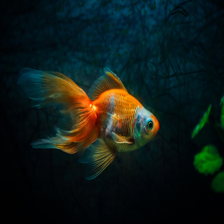

In [7]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [8]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...]

array([[[[0.        , 0.01568627, 0.02352941],
         [0.        , 0.01568627, 0.02745098],
         [0.00392157, 0.01960784, 0.03137255],
         ...,
         [0.00392157, 0.02352941, 0.03529412],
         [0.00392157, 0.02352941, 0.03921569],
         [0.        , 0.01960784, 0.03137255]],

        [[0.        , 0.01568627, 0.02745098],
         [0.        , 0.01568627, 0.02745098],
         [0.        , 0.01960784, 0.03137255],
         ...,
         [0.        , 0.01960784, 0.03529412],
         [0.        , 0.01960784, 0.03529412],
         [0.        , 0.02352941, 0.03137255]],

        [[0.        , 0.01568627, 0.02745098],
         [0.00392157, 0.01960784, 0.03137255],
         [0.        , 0.01960784, 0.03137255],
         ...,
         [0.        , 0.01568627, 0.03137255],
         [0.        , 0.01568627, 0.02745098],
         [0.        , 0.01960784, 0.03137255]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [10]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 10s 10s/step


(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [12]:
!wget 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'

--2023-02-08 10:59:58--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt.5’

ImageNetLabels.txt. 100%[===================>]  10.24K  --.-KB/s    in 0s      

2023-02-08 10:59:58 (77.9 MB/s) - ‘ImageNetLabels.txt.5’ saved [10484/10484]



In [13]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
image_labels[predicted_label_index]

'goldfish'

##Load flowers dataset

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [16]:
data_dir

'./datasets/flower_photos'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/23894449029_bf0f34d35d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9651392844_77f90589ba_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3594967811_697184b026_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21821266773_7113d34c35_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4489516263_e49fe82637_n.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg')]

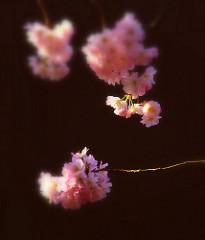

In [21]:
Image.open(str(roses[10]))

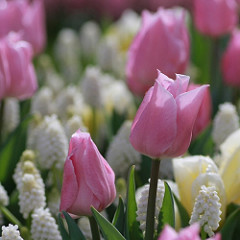

In [22]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[5]))

##Read flowers images from disk into numpy array using opencv

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg')]

In [26]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [28]:
img.shape

(240, 180, 3)

In [29]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [30]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
X = np.array(X)
y = np.array(y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing: scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [33]:
X[0].shape

(224, 224, 3)

In [34]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [35]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

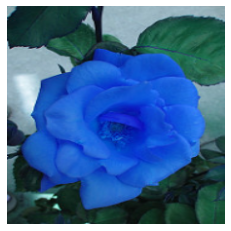

In [36]:
plt.axis('off')
plt.imshow(X[0])

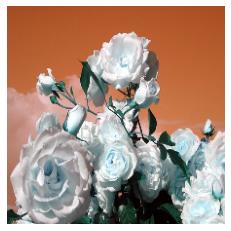

In [37]:
plt.axis('off')
plt.imshow(X[1])

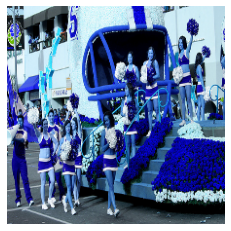

In [38]:
plt.axis('off')
plt.imshow(X[2])

In [45]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 25ms/step


array([795, 722, 550])

In [40]:
for id in predicted:
  print(image_labels[id])

shower curtain
pillow
envelope


##Now take pre-trained model and retrain it using flowers images

In [41]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [42]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [43]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=8)

Epoch 1/8
86/86 [==============================] - 8s 44ms/step - loss: 0.8516 - acc: 0.6828
Epoch 2/8
86/86 [==============================] - 4s 42ms/step - loss: 0.4104 - acc: 0.8586
Epoch 3/8
86/86 [==============================] - 4s 42ms/step - loss: 0.3247 - acc: 0.8906
Epoch 4/8
86/86 [==============================] - 4s 42ms/step - loss: 0.2635 - acc: 0.9139
Epoch 5/8
86/86 [==============================] - 4s 44ms/step - loss: 0.2262 - acc: 0.9328
Epoch 6/8
86/86 [==============================] - 4s 42ms/step - loss: 0.1953 - acc: 0.9462
Epoch 7/8
86/86 [==============================] - 4s 42ms/step - loss: 0.1776 - acc: 0.9502
Epoch 8/8
86/86 [==============================] - 4s 44ms/step - loss: 0.1529 - acc: 0.9658


In [44]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 55ms/step - loss: 0.3971 - acc: 0.8682


[0.397141695022583, 0.8681917190551758]

In [72]:
a,b,c = 1000,2000,2500

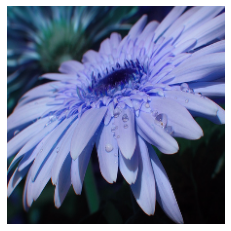

In [73]:
plt.axis('off')
plt.imshow(X[a])

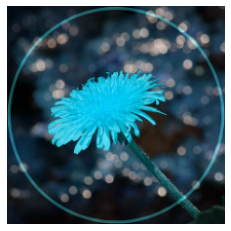

In [74]:
plt.axis('off')
plt.imshow(X[b])

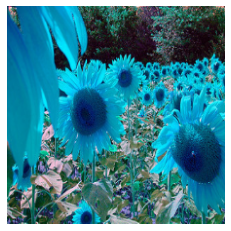

In [75]:
plt.axis('off')
plt.imshow(X[c])

In [76]:
x0_resized = cv2.resize(X[a], IMAGE_SHAPE)
x1_resized = cv2.resize(X[b], IMAGE_SHAPE)
x2_resized = cv2.resize(X[c], IMAGE_SHAPE)

In [77]:
predicted2 = model.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted2 = np.argmax(predicted2, axis=1)
predicted2

1/1 [==============================] - 0s 27ms/step


array([1, 1, 1])

In [78]:
y[a],y[b],y[c],

(1, 2, 3)

In [79]:
for id in predicted2:
  print(image_labels[id])

tench
tench
tench
